# K-Nearest Neighbors (KNN)
## Definition
The k-nearest neighbors (KNN) algorithm is a data categorization approach that estimates the chance that a data point will belong to one group or another based on the data points closest to it.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png" width=500 height=100 />

## Algorithm
The KNN technique is implemented using programming languages such as Python. The pseudocode for KNN is as follows:

* Load the data
* Initialize K to your chosen number of neighbors
* For each data point in the data:
    * Calculate the Euclidean distance between all of the training data samples. 
    * Sort and save the distances in an ordered list. 
    * From the sorted list, select the top K items. 
    * The majority of classes contained in the selected points are used to label the test point.
    
## Steps
* Step-1: Select the number K of the neighbors
* Step-2: Calculate the Euclidean distance of K number of neighbors

$$ \text{Euclidean distance} = \sqrt{(X_2-X_1)^2+(Y_2-Y_1)^2}$$
* Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
* Step-4: Among these k neighbors, count the number of the data points in each category.
* Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
* Step-6: Our model is ready.

## How to select the value of K in the K-NN Algorithm?
 
 
* Because there is no specific technique to discover the ideal value for "K," we must experiment with many values to get the best one. 

* A extremely low value for K, such as K=1 or K=2, might be noisy and cause outlier effects in the model. 

* Although large values for K are preferable, it may encounter certain obstacles.


## Advantage

* The algorithm is straightforward and simple to implement. 
* There's no need to create a model, tweak a few parameters, or make any more assumptions. 
* The algorithm is extremely adaptable. It has classification, regression, and search capabilities.

## Disadvantage
* It is always necessary to ascertain the value of K, which can be difficult at some time. 
* The calculation cost is considerable since the distance between data points for all training samples is calculated.


## Data
**User Dataset**

There is a Car manufacturer company that has manufactured a new SUV car. The company wants to give the ads to the users who are interested in buying that SUV. So for this problem, we have a dataset that contains multiple user's information through the social network. The dataset contains lots of information but the Estimated Salary and Age we will consider for the independent variable and the Purchased variable is for the dependent variable.
* **Estimated Salary** (independent variable)
* **Age** (independent variable)
* **Purchased** (yes/no; dependent variable)


## Package 
I will use the following packages in this project:
* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* [matplotlib.colors](https://het.as.utexas.edu/HET/Software/Matplotlib/api/colors_api.html)
* [numpy](https://numpy.org)
* [pandas](https://pandas.pydata.org)
* [seaborn](https://seaborn.pydata.org)
* [sklearn](https://scikit-learn.org/stable/)

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [52]:
user= pd.read_csv('user_data.csv')  
user.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


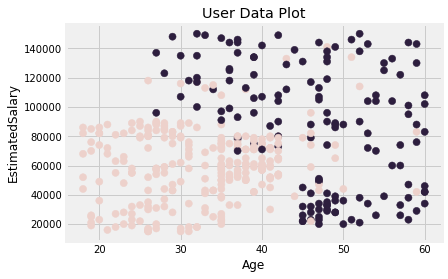

In [53]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    user['Age'],user['EstimatedSalary'], c=user['Purchased'], s=50, cmap=cmap)
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.title("User Data Plot")
plt.show()

In [54]:
# Extracting Independent and dependent Variable  
X= user.iloc[:, [2,3]].values  
y= user.iloc[:, 4].values 

## Part One: Fitting a KNN Regression with in class code 
I will fit a KNN Regression with in class code to the User Dataset.

Data Pre-Processing Step

In [55]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

I will use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to scale feature values.

In [56]:
# feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [57]:
# Define the Euclidean distance function
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [58]:
# the function of finding k nearest neighbors
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [59]:
# five nearest neighbors of one test data point
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([0.38358493, 1.11381995]), 1, 0.11597257632406532],
 [array([0.18552042, 1.08482681]), 1, 0.21632145229848812],
 [array([0.08648817, 1.05583366]), 1, 0.3027026512437892],
 [array([0.08648817, 0.76590222]), 1, 0.3769151619292776],
 [array([0.38358493, 0.59194336]), 1, 0.4059040171342291]]

In [60]:
y_test[-1]

1

### Make Prediction
KNN predict function fot test data

In [61]:
# predict function
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

### Loss Function

In [62]:
# error function
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/k

In [63]:
classification_error(X_test, y_test, X_train, y_train, 5)

1.4

### K Value Determination
The **elbow method** assists us in determining the best number of clusters for KNN clustering. It is one of the most often used approaches for determining the ideal value of K.
<img src="https://miro.medium.com/max/1378/1*6AJ0qOCplz_RIj61M5MToQ.png" width="500" height="300" />


Let's plot the classification error for various K values.

In [64]:
possible_k = [x for x in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

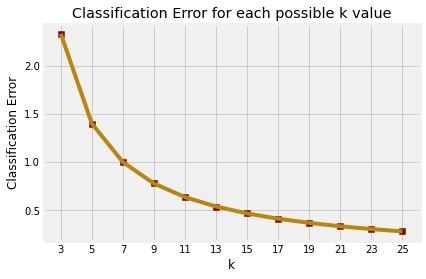

In [71]:
plt.plot(possible_k, errors, color = 'darkgoldenrod')
plt.scatter(possible_k, errors, color = 'maroon', marker = "s")
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.title('Classification Error for each possible k value')
plt.xticks(possible_k)
plt.show()

It seems that k = 9 is an optimal choice. 

In [72]:
y_pre = [KNN_Predict(point, X_train, 
                     y_train, 9) for point in X_test]

Make a comparison of the predicted and true labels.

Text(0.5, 1.0, 'Predicted value vs. True value')

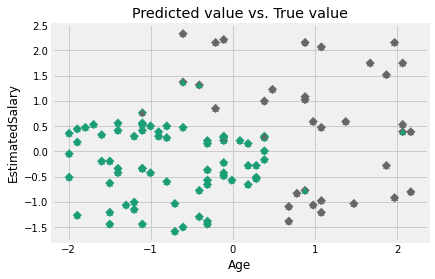

In [115]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pre, marker = 'D', cmap= 'Dark2')
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test,marker = '^',cmap= 'Dark2')


plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.title("Predicted value vs. True value")

## Part Two: Fitting a kNN Regression in scikit-learn 
I will fit a KNN Regression with functions in scikit-learn to the User Dataset.

### Fitting K-NN classifier to the Training data:
Now we will fit the K-NN classifier to the training data. To do this we will import the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class. The Parameter of this class will be:
* n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
* metric='minkowski': This is the default parameter and it decides the distance between the points.
* p=2: It is equivalent to the standard Euclidean metric.

In [117]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [118]:
#Predicting the test set result  
y_pred= classifier.predict(X_test) 

Creating the Confusion Matrix:
Now we will create the [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for our K-NN model to see the accuracy of the classifier. 

In [121]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[64,  4],
       [ 3, 29]])

There are 64 + 29 = 93 correct predictions and 3 + 4 = 7 incorrect predictions.

### Results Visualization
I will visualize the results for training data and test data, respectively, using [ListedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html). 

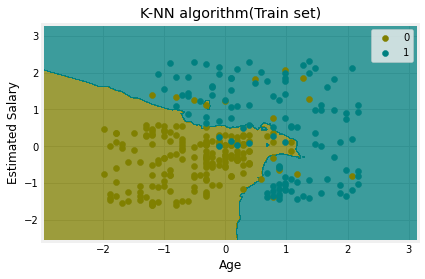

In [133]:
#Visualizing the train set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('olive','teal')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('olive','teal'))(i), label = j)  
plt.title('K-NN algorithm(Train set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

The graph is showing an irregular boundary instead of showing any straight line or any curve because it is a K-NN algorithm. It has classified users in the correct categories as most of the users who didn't buy the SUV are in the olive region and users who bought the SUV are in the teal region. The graph is showing good result but still, there are some teal points in the olive region and olive points in the teal region. But this is no big issue as by doing this model is prevented from overfitting issues. Hence our model is well trained.

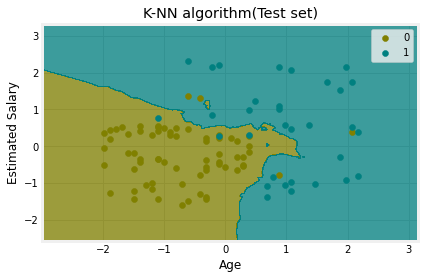

In [136]:
#Visualizing the test set result  
x_set, y_set = X_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('olive','teal')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('olive','teal'))(i), label = j)  
plt.title('K-NN algorithm(Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

The above graph is showing the output for the test data set. As we can see in the graph, the predicted output is well good as most of the olive points are in the olive region and most of the teal points are in the teal region.

However, there are few teal points in the olive region and a few olive points in the teal region. So these are the incorrect observations that we have observed in the confusion matrix(7 Incorrect output).

## Reference
Python, R. (n.d.). The K-Nearest Neighbors (kNN) Algorithm In Python – Real Python. The k-Nearest Neighbors (kNN) Algorithm in Python – Real Python. https://realpython.com/knn-python/.

K-Nearest Neighbors Algorithm | KNN Regression Python. (2018, August 22). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/.

K-Nearest Neighbor(KNN) Algorithm for Machine Learning - Javatpoint. (n.d.). www.javatpoint.com. https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning.